In [1]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
n_2_gta = 0.97847172
n_2_atg = 1.45422816

In [3]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_GtA_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_GtA_Labday_3.txt')

#Intensity of laser
E_0_S = 5 #1.8 on the day
E_0_P = 1.25

#Intensity of transmitted and reflected light
E_1_S = S_pol_L3[:,5]
E_2_S = S_pol_L3[:, 2]

E_1_P = P_pol_L3[:, 5]
E_2_P = P_pol_L3[:, 2]

In [4]:
#Getting the small r value
r_s = E_1_S/E_0_S

r_p =E_1_P/E_0_P
r_p, r_s

(array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.    , 0.    , 0.0024, 0.0042, 0.0044, 0.009 , 0.017 , 0.03  ,
        0.062 ]))

In [5]:
#Getting the small t value
t_s = E_2_S/E_0_S

t_p = E_2_P/E_0_P
t_p, t_s

(array([0.184, 0.192, 0.176, 0.172, 0.144, 0.144, 0.12 , 0.092, 0.064]),
 array([0.52 , 0.52 , 0.48 , 0.46 , 0.42 , 0.4  , 0.34 , 0.22 , 0.132]))

In [6]:
#Import the angles measured:
theta1_s = S_pol_L3[:, 0]
thetam_reflect_s = S_pol_L3[:, 4]
thetam_trans_s = S_pol_L3[:, 1]

theta1_p = P_pol_L3[:, 0]
thetam_reflect_p = P_pol_L3[:, 4]
thetam_trans_p = P_pol_L3[:, 1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
#thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
thetam_reflect_s = 180 - np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
#thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
thetam_reflect_p = 180 - np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s + thetam_reflect_s
theta2_trans_s = theta1_s + thetam_trans_s

theta2_reflect_p = theta1_p + thetam_reflect_p
theta2_trans_p = theta1_p + thetam_trans_p

In [7]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) * n_2_gta/n_2_atg * t_s**2

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) * n_2_gta/n_2_atg * t_p**2

T_s


array([0.18193758, 0.18127124, 0.15240118, 0.13617675, 0.10938534,
       0.09360351, 0.0606773 , 0.02106717, 0.00498255])

In [8]:
#Check if R+T holds:
total_s = r_s + t_s

total_p = r_p + t_p
total_p, total_s

(array([0.184, 0.192, 0.176, 0.172, 0.144, 0.144, 0.12 , 0.092, 0.064]),
 array([0.52  , 0.52  , 0.4824, 0.4642, 0.4244, 0.409 , 0.357 , 0.25  ,
        0.194 ]))

In [9]:
#Brewster angle
Brewster = np.arctan(n_2_atg/n_2_gta)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

INTENSITY PLOTS GLASS TO AIR

In [10]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

C:\Users\hanse\AppData\Local\Temp\ipykernel_8256\3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
C:\Users\hanse\AppData\Local\Temp\ipykernel_8256\3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


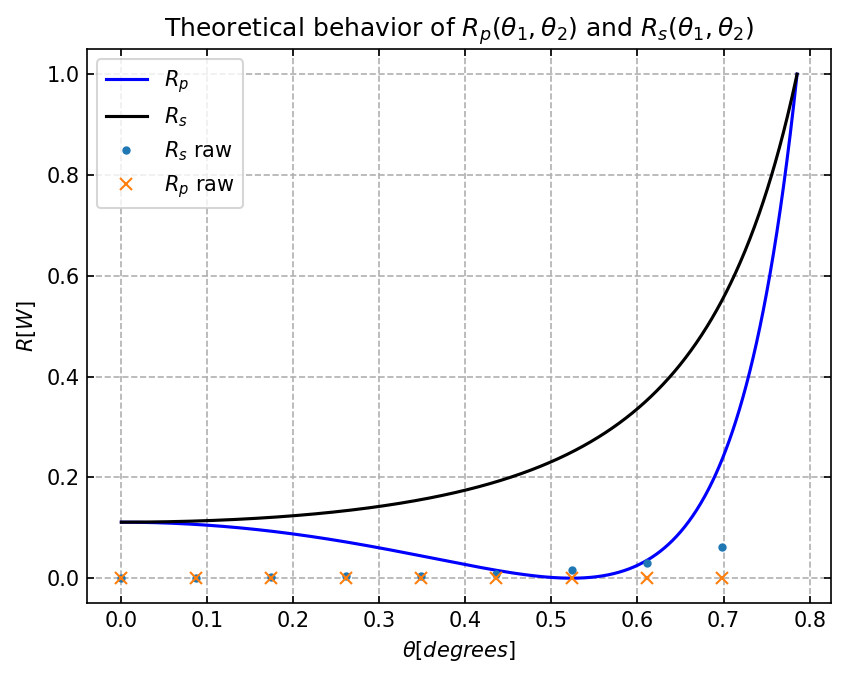

In [25]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 45, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 45, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 + theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
plt.plot(theta1_s, r_s, '.', label = '$R_s$ raw')
plt.plot(theta1_p, r_p, 'x', label = '$R_p$ raw')


# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [degrees]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

C:\Users\hanse\AppData\Local\Temp\ipykernel_8256\3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
C:\Users\hanse\AppData\Local\Temp\ipykernel_8256\3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


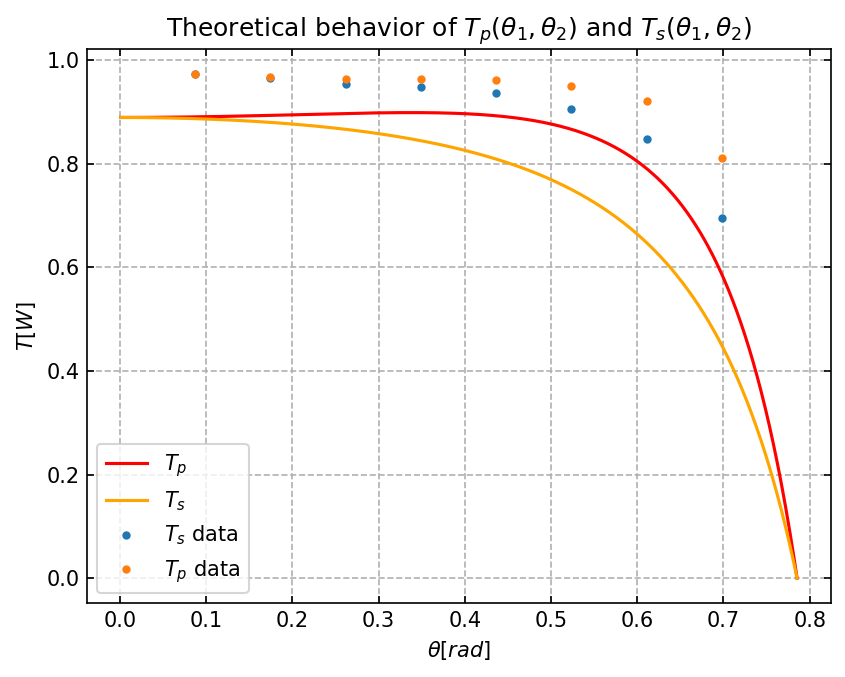

In [26]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')
plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()